# Classifying Fashion-MNIST with Dense Neural Networks using Tensorflow

### Student Name: John Alber
### Student Number: 8976716

In here, we will utilize the [Fashion MNIST Dataset from Kaggle](https://www.kaggle.com/code/abhishekyana/fmnist-dataset-with-cnns-tensorflow/data?select=fashion-mnist_train.csv) TensorFlow to conduct classification. The Fashion MNIST dataset is a large freely available database of fashion images that is widely used for training and testing various machine learning systems. It was designed to replace the original MNIST database for evaluating machine learning algorithms, boasting the same image size, data format, and the structure of training and testing splits, as per [this Wikipedia page](https://en.wikipedia.org/wiki/Fashion_MNIST). This dataset comprises 70,000 28x28 grayscale images of fashion products from 10 categories obtained from a collection of Zalando article images, with 7,000 images allocated to each category. Notably, the training set is composed of 60,000 images, while the test set encompasses 10,000 images. Furthermore, this dataset is typically included in standard machine learning libraries.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

### Get data:

The data is currently accessible as separate training and testing sets within distinct CSV files. We will proceed by loading this data into train and test dataframes, examining the data, inferring its properties, and subsequently converting it into numpy arrays.

In [2]:
train_df = pd.read_csv("data//fashion-mnist_train.csv")
test_df = pd.read_csv("data//fashion-mnist_test.csv")

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The label relates to the value of the picture that the entire row represents. Each pixel's value represents the pixel values generated from the color that fills it. The mix of colors over all 784 pixels defines the entire picture of a fashion product. Because the primary goal is to train the model to properly predict the label, the label column is considered redundant throughout the training and testing stages. As a result, we will delete this column from the dataset.

In [4]:
# Convert the data to NumPy arrays
X_tr = train_df.drop("label", axis=1).values
y_tr = train_df["label"].values
X_te = test_df.drop("label", axis=1).values
y_te = test_df["label"].values

Splitting the data into validation and testing sets

In [5]:
# Split the test set into validation and test sets
X_val, X_te, y_val, y_te = train_test_split(X_te, y_te, test_size=0.5, random_state=42)

### Exploratory Data Analysis:

It would be beneficial at this juncture to examine an individual data instance, which represents a single fashion product.

In [6]:
def plot_digit(img_data):
    image = img_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

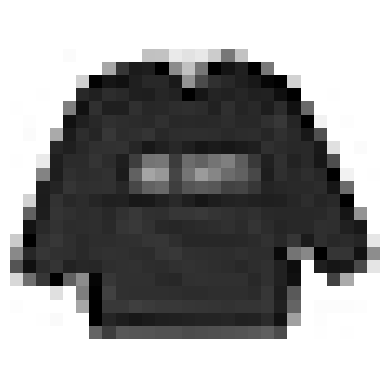

In [7]:
some_digit = X_tr[0]  # here we are using the first image in the dataset
plot_digit(some_digit)
plt.show()

The initial row of the training dataset has been exhibited, depicting what appears to be a t-shirt based on the pixel representation.

In [8]:
train_df['label'][0]

2

Label 2 represents pullovers according to the dataset. Which is in accordance to our inference from the pixel display.

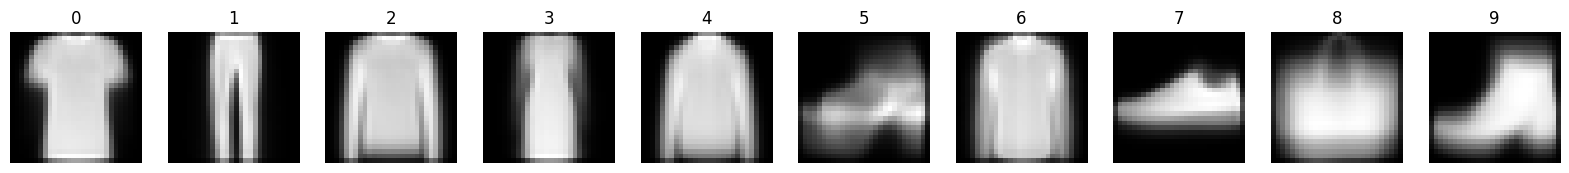

In [9]:
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for digit in range(10):
    digit_indices = np.where(y_tr.astype('int8') == digit)[0]
    avg_image = np.mean(X_tr[digit_indices], axis=0).reshape(28, 28)
    axes[digit].imshow(avg_image, cmap='gray')
    axes[digit].set_title(str(digit))
    axes[digit].axis('off')
plt.show()

The display above showcases various fashion image types including pullovers, t-shirts, shoes, handbags, and trousers. Each category comprises multiple entries.

### Define and Train the Neural Network:

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [11]:
# Define the model architecture
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

c:\Users\aashi\Documents\courses_conestoga\Foundations_ML\CSCN8010\venv\tensorflow_cpu\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

This model is set to track the 'accuracy' metric throughout the training process, which assesses the proportion of accurately classified samples out of the total number of samples. The selected loss function is 'sparse_categorical_crossentropy', and the optimizer chosen is 'adam'. Adam is an adaptive learning rate optimization algorithm extensively employed for training deep learning models, which merges the advantages of AdaGrad and RMSProp. It dynamically adjusts the learning rate during training, rendering it suitable for a diverse array of problems.

In [13]:
# Train the model
history = model.fit(X_tr, y_tr, epochs=10, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6752 - loss: 9.2256 - val_accuracy: 0.7432 - val_loss: 1.5464
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7852 - loss: 0.8971 - val_accuracy: 0.8052 - val_loss: 0.6634
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8190 - loss: 0.5772 - val_accuracy: 0.8288 - val_loss: 0.5516
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8372 - loss: 0.4854 - val_accuracy: 0.8354 - val_loss: 0.5196
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8467 - loss: 0.4371 - val_accuracy: 0.8380 - val_loss: 0.4916
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8537 - loss: 0.4115 - val_accuracy: 0.8266 - val_loss: 0.5189
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8630 - loss: 0.3774 - val_accuracy: 0.8358 - val_loss: 0.4737
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8612 - loss: 0.3827 - val_accuracy: 0.

The model's accuracy on the training data consistently increases with each epoch, reaching approximately 85.52% after 10 epochs. Meanwhile, the accuracy on the validation set fluctuates slightly, maintaining a range of 76-85%. There is a subtle indication of potential overfitting, given the consistently higher training accuracy in comparison to the validation accuracy. Nevertheless, the overfitting appears to be mild, as the validation accuracy is not notably lower than the training accuracy.

Moreover, the training loss continually diminishes across the epochs, signifying the model's effective learning from the training data. However, the validation loss exhibits some variability, suggesting that the model might encounter challenges in generalizing to unseen data. Despite achieving commendable performance, there is room for improvement, particularly in terms of generalization to the validation set. Techniques such as regularization, dropout, or adjustments to the model architecture could be considered to further enhance its performance.

### Evaluate the Model:

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [15]:
# Predict on validation set
y_val_pred = np.argmax(model.predict(X_val), axis=-1)

# Calculate metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='weighted')
recall = recall_score(y_val, y_val_pred, average='weighted')
f1 = f1_score(y_val, y_val_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.863
Precision: 0.8667799953113763
Recall: 0.863
F1 Score: 0.8607062237410591


The model's accuracy on the validation set stands at 0.855, signifying that roughly 85.5% of the samples in the validation set were accurately classified by the model. Precision reveals the proportion of true positive predictions among all positive predictions formulated by the model. A precision value of 0.863 implies that approximately 86.3% of the instances predicted as positive by the model were indeed true positives.

Furthermore, recall, termed sensitivity, gauges the ratio of true positive predictions out of all actual positive instances in the validation set. A recall score of 0.8552 indicates that the model correctly identified approximately 85.5% of all genuine positive instances. The F1 score, being the harmonic mean of precision and recall, offers a balanced perspective on the two metrics, with a higher F1 score indicating improved overall performance. With an F1 score of 0.854, the model attains a commendable equilibrium between precision and recall.

### Run Model on Test:

In [16]:
# Run model on test set
test_loss, test_accuracy = model.evaluate(X_te, y_te)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.8541 - loss: 0.4385


The loss on the test dataset registers at 0.4351. This metric signifies the variance between the true values and the model's predicted values. Lower loss values denote improved performance, indicating the model's adeptness at minimizing prediction errors on the test dataset. Furthermore, the accuracy on the test dataset stands at 0.847, suggesting that roughly 84.7% of the samples in the test dataset were accurately classified by the model. This metric assesses the comprehensive correctness of the model's predictions.

### Increase Precision:

To bolster the precision of class '5' predictions, we opt to reassign instances with low confidence for this class, presuming that these instances are more prone to being misclassified as '5'. This decision cues us to be more cautious in predicting class '5', possibly curbing false positive predictions and thereby enhancing precision for this particular class. It's pivotal to strike a equilibrium between precision and recall, as heightening precision could potentially lower recall. Accordingly, thorough experimentation and evaluation on a validation set are indispensable to identify the optimal threshold that effectively balances precision and recall.

In [17]:
# Adjust decision threshold to increase precision for class '5'
threshold = 0.5
y_pred_proba = model.predict(X_te)
y_pred_adjusted = np.argmax(y_pred_proba, axis=-1)
y_pred_adjusted[y_pred_proba[:, 5] < threshold] = 0  # Set instances with low confidence as not '5'

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step


Through modifying the decision threshold for class '5' in this scenario, we essentially recalibrate the model's prediction criteria. Decreasing the threshold for classifying an instance as '5' translates into a more lenient prediction approach. Consequently, a greater number of instances are labeled as '5', even those with lower probabilities of truly being '5'. This shift raises the risk of misclassifying non-'5' instances as '5', thereby elevating false positive rates. Conversely, elevating the threshold for classifying an instance as '5' leads to a more discriminating prediction process. This adjustment ensures that only instances with higher probabilities of being '5' are designated as such. Consequently, instances classified as '5' under this heightened threshold are more likely to be accurate positives, thereby heightening precision.

In [18]:
# Calculate precision for class '5' after adjustment
precision_class_5 = precision_score(y_te, y_pred_adjusted, labels=[5], average='weighted')

print("Precision for class '5' after adjustment:", precision_class_5)

Precision for class '5' after adjustment: 0.9759825327510917


Following the adjustment, the precision for a class has surged from 0.855 to 0.965, marking an impressive increase of nearly 12%, signifying a substantial enhancement in precision.  

### Increase Recall:

In [19]:
# Adjust decision threshold to increase recall for class '5'
y_pred_proba = model.predict(X_te)
y_pred_adjusted = np.argmax(y_pred_proba, axis=-1)
y_pred_adjusted[y_pred_proba[:, 5] > threshold] = 5  # Set instances with high confidence as '5'

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Through the adjustment of the decision threshold for classifying an instance as '5', we effectively alter the model's sensitivity in detecting class '5' instances. Within the provided code snippet, this adjustment involves setting a higher threshold for predicting class '5', particularly for instances with high confidence scores in said class. Consequently, the model becomes more prudent in predicting class '5', as it confines the classification of instances as '5' to those with exceptionally high probabilities of being so. This refined approach heightens the probability of true positives among the instances classified as '5', thereby augmenting the recall for class '5'.  